# Práctica de laboratorio: Análisis de Emociones y Sentimiento

## Recursos



[Natural Language Toolkit](https://www.nltk.org/)

[Léxico de Emociones](https://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm)

[WordNet](https://wordnet.princeton.edu/)

[ProjectGutenberg](https://www.gutenberg.org/)


In [15]:
from collections import defaultdict, Counter

## Tarea 1 (1.5 puntos)

Cargar en una estructura de datos Python el Word-Emotion Association Lexicon del NRC5. Asegúrate de entender cómo se estructura el léxico y cómo se mapean las palabras a las emociones. Hay que tener en cuenta que existen varios ficheros con la misma información: un fichero con toda la información, un fichero por emoción, etc. Se puede elegir la opción que se estime oportuna. Se deberá considerar cómo organizar el léxico en memoria para un acceso rápido durante el análisis.

In [5]:
emotion_to_words = defaultdict(set)
words_to_emotion = defaultdict(list)

# Ruta al archivo del léxico
lexicon_path = "C:/Users/cvzad/Documents/all_obs/master/mintex/git/Practicelab_01/EmoLex/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt"

# Cargar el fichero
with open(lexicon_path, 'r') as file:
    for line in file:
        word, emotion, association = line.strip().split('\t')
        if association == '1':
            emotion_to_words[emotion].add(word)
            words_to_emotion[word].append(emotion) # TODO ver si uso las dos o solo una para descartar la otra

## Tarea 2 (3.0 puntos)

Extender EmoLex utilizando WordNet desde NLTK6 para incluir sinónimos, hipónimos, hiperónimos de las palabras ya presentes en el léxico. También puedes usar la función derivationally_related_forms() de WordNet de modo que el léxico pueda extenderse más aún. Esta función devuelve una lista de formas derivadas de una palabra, como plurales, participios pasados, etc. Esto puede ser útil para encontrar variaciones de una palabra que puedan estar asociadas con la misma emoción. El léxico deberá implementarse como un diccionario Python que tenga como clave una dupla <lemma, POS-tag>, y como valor la lista de emociones con las que dicha dupla se podría asociar. 

Para poder usar NLTK y WordNet deberás instalar NLTK con pip y luego importarlas y cargarlas del siguiente modo:

In [4]:
from nltk.corpus import wordnet as wn
import nltk
nltk.download('wordnet') 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cvzad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
extended_lexicon = defaultdict(set)

for words, emotions in words_to_emotion.items():
    # Recorrer todos los synsets de la palabra
    for syn in wn.synsets(words):
        pos = syn.pos()
        for lemma in syn.lemmas():
            lemma_lower = lemma.name().lower()
            extended_lexicon[(lemma_lower, pos)].update(emotions)
            # Formas derivadas
            for form in lemma.derivationally_related_forms():
                derivada = form.name().lower()
                extended_lexicon[(derivada, pos)].update(emotions)

Por otra parte, dado que la codificación de POS-tagging que emplea WordNet no es la del PennTreeBank, para hacer traducciones entre una y otra nomenclatura, se puede emplear los siguientes diccionarios. 

In [ ]:
wordnet_to_penn = {
    'n': 'NN', # sustantivo
    'v': 'VB', # verbo
    'a': 'JJ', # adjetivo
    's': 'JJ', # adjetivo superlativo
    'r': 'RB', # adverbio
    'c': 'CC' # conjunción
}
penn_to_wordnet = {
    'CC': 'c', # Coordinating conjunction
    'CD': 'c', # Cardinal number
    'DT': 'c', # Determiner
    'EX': 'c', # Existential there
    'FW': 'x', # Foreign word
    'IN': 'c', # Preposition or subordinating conjunction
    'JJ': 'a', # Adjective
    'JJR': 'a', # Adjective, comparative
    'JJS': 'a', # Adjective, superlative
    'LS': 'c', # List item marker
    'MD': 'v', # Modal
    'NN': 'n', # Noun, singular or mass
    'NNS': 'n', # Noun, plural
    'NNP': 'n', # Proper noun, singular
    'NNPS': 'n', # Proper noun, plura
    'PDT': 'c', # Predeterminer
    'POS': 'c', # Possessive ending
    'PRP': 'n', # Personal pronoun
    'PRP$': 'n', # Possessive pronoun
    'RB': 'r', # Adverb
    'RBR': 'r', # Adverb, comparative
    'RBS': 'r', # Adverb, superlative
    'RP': 'r', # Particle
    'SYM': 'x', # Symbol
    'TO': 'c', # to
    'UH': 'x', # Interjection
    'VB': 'v', # Verb, base form
    'VBD': 'v', # Verb, past tense
    'VBG': 'v', # Verb, gerund or present participle
    'VBN': 'v', # Verb, past participle
    'VBP': 'v', # Verb, non-3rd person singular present
    'VBZ': 'v', # Verb, 3rd person singular present
    'WDT': 'c', # Wh-determiner
    'WP': 'n', # Wh-pronoun
    'WP$': 'n', # Possessive wh-pronoun
    'WRB': 'r', # Wh-adverb
    'X': 'x' # Any word not categorized by the other tags
}

## Tarea 3 (1.5 puntos)

Cargar el texto de novelas clásicas disponibles en Project Gutenberg. El siguiente es un diccionario con 10 novelas conocidas que están accesibles en Project Gutenberg que puedes usar en tu código.

In [ ]:
books = {
    'Crime and Punishment ': 'http://www.gutenberg.org/files/2554/2554-0.txt',
    'War and Peace': 'http://www.gutenberg.org/files/2600/2600-0.txt',
    'Pride and Prejudice': 'http://www.gutenberg.org/files/1342/1342-0.txt',
    'Frankenstein': 'https://www.gutenberg.org/cache/epub/84/pg84.txt',
    'The Adventures of Sherlock Holmes': 'http://www.gutenberg.org/files/1661/1661-0.txt',
    'Ulysses': 'http://www.gutenberg.org/files/4300/4300-0.txt',
    'The Odyssey': 'https://www.gutenberg.org/cache/epub/1727/pg1727.txt',
    'Moby Dick': 'http://www.gutenberg.org/files/15/15-0.txt',
    'The Divine Comedy': 'https://www.gutenberg.org/cache/epub/8800/pg8800.txt',
    'Critias': 'https://www.gutenberg.org/cache/epub/1571/pg1571.txt'
} 

Se puede usar el siguiente fragmento de código para descargar el texto de una novela:

In [ ]:
import requests 

def download_text(url):
   """Descarga el texto de una novela en formato txt."""
   try:
      response = requests.get(url)
      response.raise_for_status() # Lanza excepción para códigos HTTP 4xx/5xx
      return response.text
   except requests.exceptions.RequestException as e:
      print(f"Error al descargar el texto: {e}")
      return None 

## Tarea 4 (3.0 puntos)

Implementar una función para analizar el texto de las novelas de forma básica, contando las ocurrencias de palabras vinculadas con emociones en el texto. Esta función debe:

- Leer el texto y dividirlo en palabras individuales (tokenización).
- Asignar a cada palabra su correspondiente etiqueta de parte del discurso (POS-tagging) para diferenciar entre verbos, sustantivos, adjetivos, etc.
- Lematizar las palabras para reducirlas a su forma base (por ejemplo, "running" a "run").
- Comparar cada dupla <lema, POS-tag> con las entradas en el léxico extendido para determinar la emoción asociada.
- Contar las ocurrencias de cada emoción en el texto y generar un informe detallado.

Solo por si se necesita a modo de soporte, es posible que la implementación a realizar deba hacer los siguientes import y deba descargar (download) los siguientes recursos de NLTK:

In [ ]:
from nltk.corpus import wordnet as wn
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger_eng') # el que estaba puesto no funcionaba
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\cvzad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cvzad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\cvzad\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\cvzad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
def get_wordnet_pos(penn_tag):
    return penn_to_wordnet.get(penn_tag, None)

lemmatizer = WordNetLemmatizer()

def emotion_analyzer(text, extended_lexicon):
    from collections import Counter
    from nltk import word_tokenize, pos_tag
    
    counted_emotions = Counter()
    
    tokens = word_tokenize(text.lower())
    tagged = pos_tag(tokens)

    for word, pos_tag_penn in tagged:
        wn_pos = get_wordnet_pos(pos_tag_penn)
        if wn_pos in ['n', 'v', 'a', 'r', 's']: # la 'c' no está porque me daba error 
            lema = lemmatizer.lemmatize(word, pos=wn_pos)
            emotions = extended_lexicon.get((lema, wn_pos), [])
            counted_emotions.update(emotions)
    
    return counted_emotions

In [42]:
#ejemplillo para ver si funciona

text = download_text(books['Pride and Prejudice'])
count_emotions = emotion_analyzer(text, extended_lexicon)
print(count_emotions.most_common(10))


[('positive', 35492), ('trust', 28878), ('anticipation', 24689), ('negative', 20700), ('joy', 15439), ('surprise', 13752), ('fear', 13421), ('sadness', 12577), ('anger', 11959), ('disgust', 8853)]


In [46]:
all_books = defaultdict(list)

for book in books:
    text = download_text(books[book])
    count_emotions = emotion_analyzer(text, extended_lexicon)
    all_books[book] = count_emotions

## Tarea 5 (1.0 puntos)

Presentar los resultados del análisis en las novelas clásicas. Incluir estadísticas sobre las emociones más comunes y cualquier patrón interesante que hayas observado. Considerar cómo visualizar los datos y cómo explicar las conclusiones del análisis solicitado.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# TODO revisar esto que me lo ha hecho chati
def plot_emotions_bar(conteo_emociones, titulo="Distribución de emociones"):
    emociones = list(conteo_emociones.keys())
    frecuencias = list(conteo_emociones.values())

    plt.figure(figsize=(10, 6))
    bars = plt.bar(emociones, frecuencias)
    plt.title(titulo)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
    
def plot_emotions_radar(conteo_emociones, titulo="Perfil emocional"):
    import matplotlib.pyplot as plt

    labels = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
    valores = [conteo_emociones.get(e, 0) for e in labels]

    # Normalización opcional
    total = sum(valores)
    valores_norm = [v / total if total > 0 else 0 for v in valores]

    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    valores_cerrados = valores_norm + [valores_norm[0]]
    angles_cerrados = angles + [angles[0]]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles_cerrados, valores_cerrados, linewidth=2)
    ax.fill(angles_cerrados, valores_cerrados, alpha=0.3)
    ax.set_thetagrids(np.degrees(angles), labels)
    ax.set_title(titulo, size=14)
    ax.grid(True)
    plt.show()

def plot_emotions_comparison(resultados_dict):
    emociones = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
    novelas = list(resultados_dict.keys())
    
    proporciones = []
    for novela in novelas:
        total = sum(resultados_dict[novela].values())
        proporciones.append([resultados_dict[novela].get(e, 0) / total if total > 0 else 0 for e in emociones])
    
    proporciones = np.array(proporciones).T  # transponer para apilar

    fig, ax = plt.subplots(figsize=(12, 6))
    bottom = np.zeros(len(novelas))
    for i, emocion in enumerate(emociones):
        ax.bar(novelas, proporciones[i], bottom=bottom, label=emocion)
        bottom += proporciones[i]

    ax.set_title("Distribución de emociones comparada entre novelas")
    ax.set_ylabel("Proporción")
    ax.legend(loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
for book in all_books:
    plot_emotions_bar(all_books[book], titulo= book)

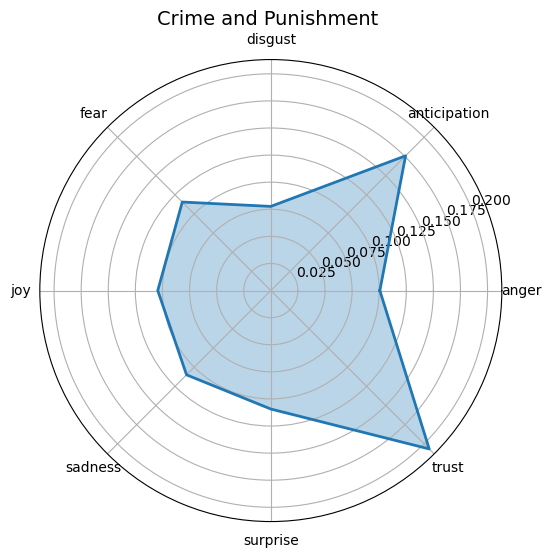

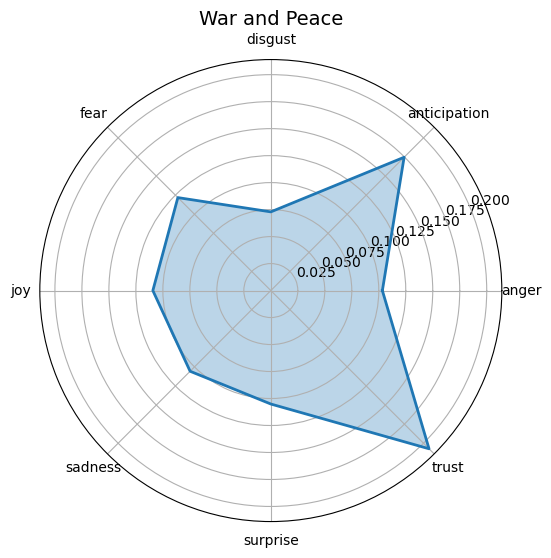

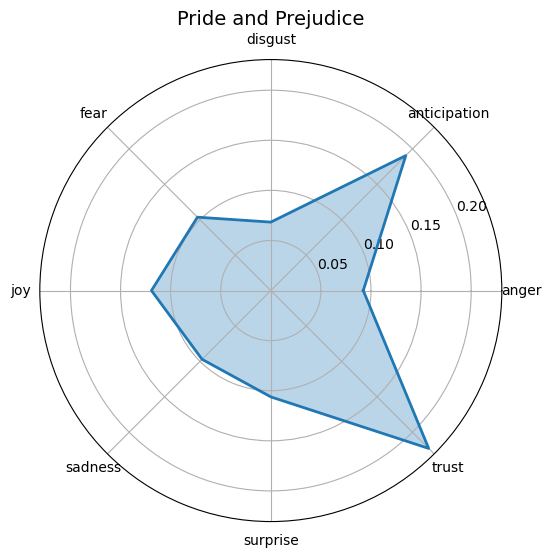

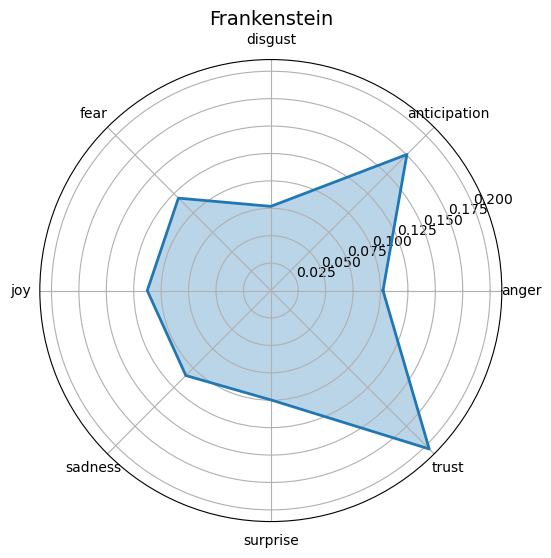

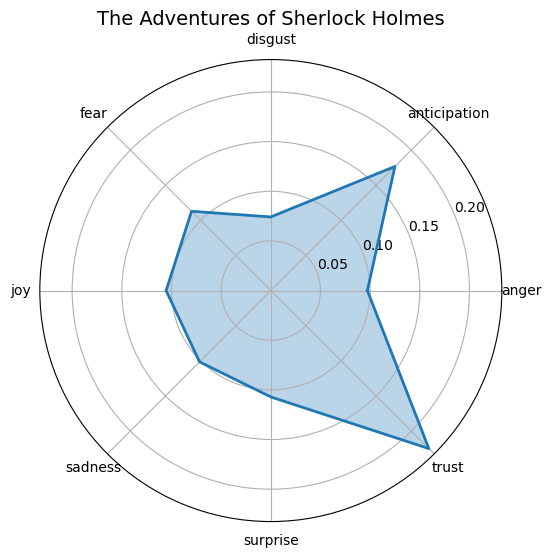

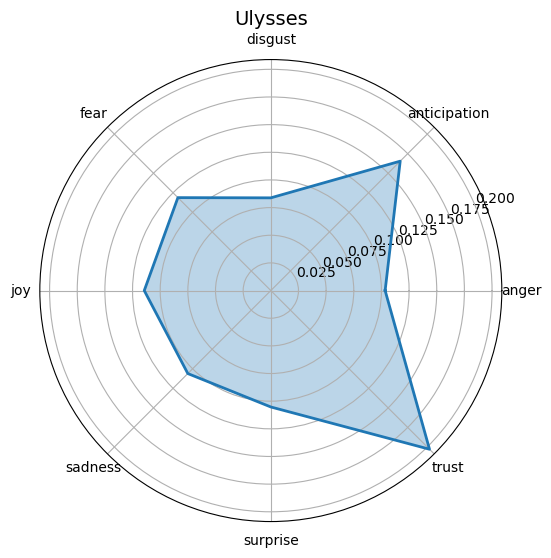

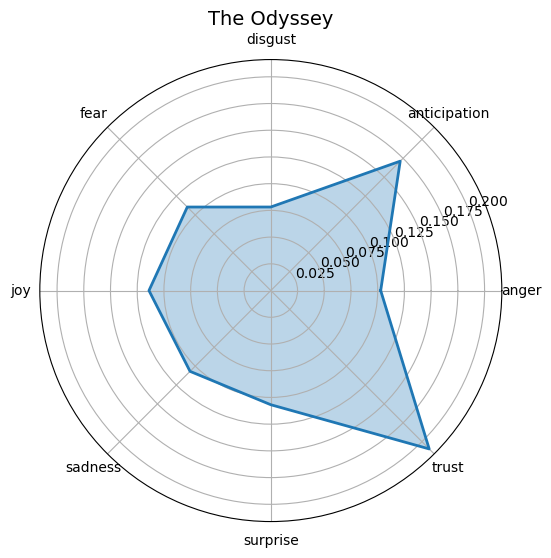

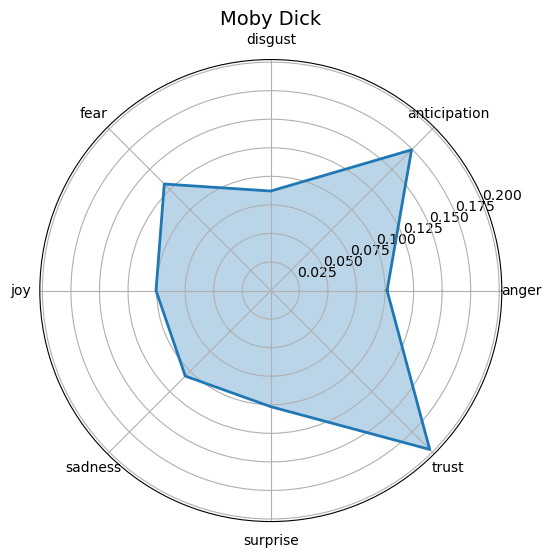

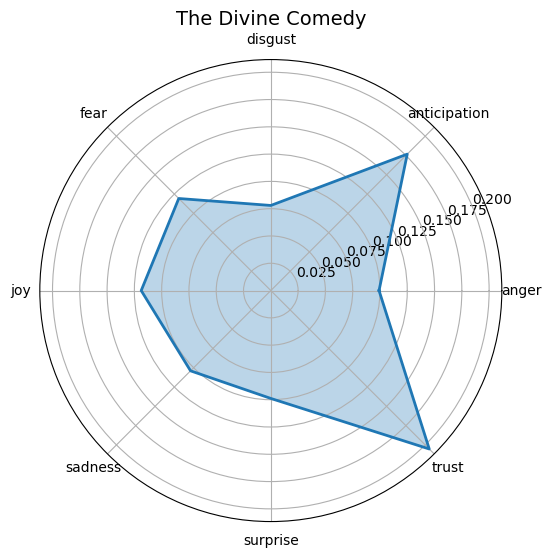

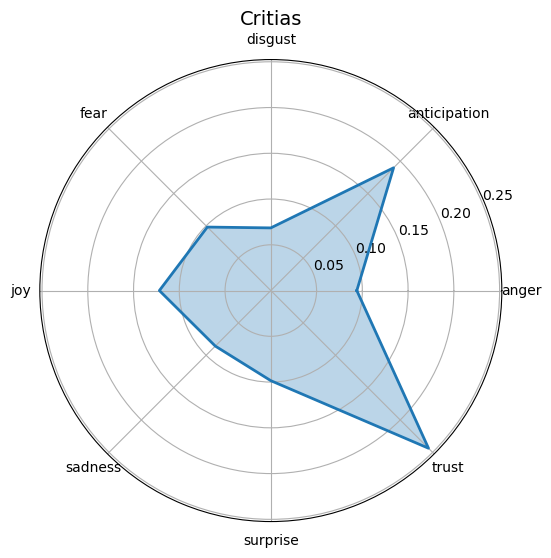

In [ ]:
for book in all_books:
    plot_emotions_radar(all_books[book], titulo= book)

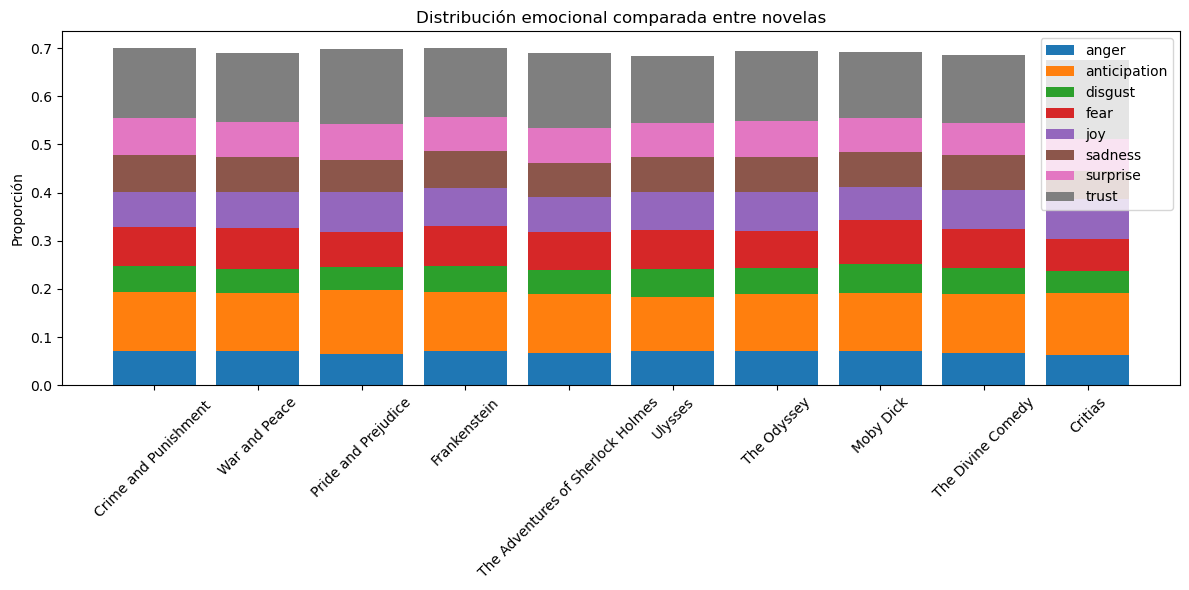

In [49]:
plot_emotions_comparison(all_books)